<a href="https://colab.research.google.com/github/IvanKatorgin/Feature-Engineering/blob/main/%D0%A0%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%D1%81_%D0%BF%D1%80%D0%B8%D0%B7%D0%BD%D0%B0%D0%BA%D0%B0%D0%BC%D0%B8_%D0%B8_%D0%BF%D0%BE%D1%81%D1%82%D1%80%D0%BE%D0%B5%D0%BD%D0%B8%D0%B5_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D0%B5%D0%B9_%D0%B4%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D0%B5%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Курс "Работа с признаками и построение моделей". Домашнее задание 11. Улучшение качества модели. Каторгин И.П.

## Описание задания

В домашнем задании нужно решить задачу классификации наличия болезни сердца у пациентов наиболее эффективно. Данные для обучения моделей необходимо загрузить самостоятельно с сайта https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction. Целевая переменная – наличие болезни сердца (HeartDisease). Она принимает значения 0 или 1 в зависимости от отсутствия или наличия болезни соответственно. Подробное описание признаков можно прочесть в описании датасета на сайте. Для выполнения работы не обязательно вникать в медицинские показатели.

Этапы работы:

1. Получите данные и загрузите их в рабочую среду.
2. Подготовьте датасет к обучению моделей:

a) Категориальные переменные переведите в цифровые значения. Можно использовать pd.get_dummies, preprocessing.LabelEncoder. Старайтесь не использовать для этой задачи циклы.
3. Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.
4. Обучите модель логистической регрессии с параметрами по умолчанию.
5. Подсчитайте основные метрики модели. Используйте следующие метрики и функцию:
cross_validate(…, cv=10, scoring=[‘accuracy’,‘recall’,‘precision’,‘f1’])
6. Оптимизируйте 3-4 параметра модели:

a) Используйте GridSearchCV.

b) Используйте RandomizedSearchCV.

c) *Добавьте в п. 6b 2-5 моделей классификации и вариации их параметров.

d) Повторите п. 5 после каждого итогового изменения параметров.
7. Сформулируйте выводы по проделанной работе:

a) Сравните метрики построенных моделей.

b) *Сравните с полученными результатами в домашнем задании по теме «Ансамблирование».


## Получите данные и загрузите их в рабочую среду

In [2]:
# загрузим необходимые библиотеки
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, scipy.stats as st
from matplotlib import colors, font_manager
%matplotlib inline
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, GridSearchCV, cross_val_score, ShuffleSplit, cross_validate, RandomizedSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report, roc_curve, auc, roc_auc_score, mean_squared_error, r2_score, make_scorer, precision_recall_curve, mutual_info_score
from sklearn.tree import DecisionTreeClassifier, plot_tree, DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor, GradientBoostingClassifier, BaggingRegressor, BaggingClassifier, StackingRegressor, StackingClassifier, IsolationForest
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier, LocalOutlierFactor, NeighborhoodComponentsAnalysis
from sklearn.covariance import EllipticEnvelope
from sklearn.svm import LinearSVC, OneClassSVM, SVR, SVC
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.inspection import permutation_importance
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_selection import SequentialFeatureSelector, RFE, SelectFromModel, SelectKBest, SelectPercentile, f_classif, chi2, mutual_info_classif, VarianceThreshold
from sklearn.naive_bayes import BernoulliNB, ComplementNB, GaussianNB, MultinomialNB
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from google.colab import files
import warnings
warnings.filterwarnings("ignore")

In [3]:
! pip install -q kaggle

In [4]:
! kaggle datasets download fedesoriano/heart-failure-prediction

Dataset URL: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction
License(s): ODbL-1.0
  0% 0.00/8.56k [00:00<?, ?B/s]
100% 8.56k/8.56k [00:00<00:00, 11.8MB/s]


In [5]:
# загрузка
! unzip heart-failure-prediction.zip

Archive:  heart-failure-prediction.zip
  inflating: heart.csv               


In [6]:
# прочитаем данные
df = pd.read_csv('heart.csv', sep=',', encoding='utf-8')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Разведочный анализ данных проводить не будем, т.к. он был проведен в домашней работе 7 по теме "Ансамблирование"

## Подготовьте датасет к обучению моделей

a) Категориальные переменные переведите в цифровые значения. Можно использовать pd.get_dummies, preprocessing.LabelEncoder. Старайтесь не использовать для этой задачи циклы

In [7]:
# переведем категориальные признаки в числовые
df_cat = pd.get_dummies(df)
df_cat

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,False,True,False,...,False,False,False,True,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,True,False,False,...,True,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,False,True,False,...,False,False,False,False,True,True,False,False,False,True
3,48,138,214,0,108,1.5,1,True,False,True,...,False,False,False,True,False,False,True,False,True,False
4,54,150,195,0,122,0.0,0,False,True,False,...,True,False,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,False,True,False,...,False,True,False,True,False,True,False,False,True,False
914,68,144,193,1,141,3.4,1,False,True,True,...,False,False,False,True,False,True,False,False,True,False
915,57,130,131,0,115,1.2,1,False,True,True,...,False,False,False,True,False,False,True,False,True,False
916,57,130,236,0,174,0.0,1,True,False,False,...,False,False,True,False,False,True,False,False,True,False


## Разделите выборку на обучающее и тестовое подмножество

80% данных оставить на обучающее множество, 20% на тестовое

In [8]:
# целевая переменная y - HeartDisease
X = df_cat.drop('HeartDisease', axis=1)
y = df_cat['HeartDisease']

In [9]:
# разделим выборку на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((734, 20), (184, 20), (734,), (184,))

## Обучите модель логистической регрессии с параметрами по умолчанию

In [11]:
# обучим модель логистической регрессии
model = LogisticRegression()
model.fit(X_train, y_train)
LogisticRegression()

LogisticRegression()

In [12]:
# для тестового множества сделаем предсказание целевой переменной
y_pred = model.predict(X_test)
y_pred

array([0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1])

## Подсчитайте основные метрики модели

Используйте следующие метрики и функцию: cross_validate(…, cv=10, scoring=[‘accuracy’,‘recall’,‘precision’,‘f1’])

In [13]:
# посчитаем основные метрики через функцию cross_validate и округлим до 4 знаков после запятой

def evaluate_model(model, X_test, y_test):
    cv_results = cross_validate(model, X, y, cv=10, scoring=['accuracy', 'recall', 'precision', 'f1'])
    return {
#        'fit_time': cv_results['fit_time'].round(4),
#        'score_time': cv_results['score_time'].round(4),
        'accuracy': cv_results['test_accuracy'].round(4),
        'recall': cv_results['test_recall'].round(4),
        'precision': cv_results['test_precision'].round(4),
        'f1': cv_results['test_f1'].round(4)
    }

In [14]:
metrics_model_1 = evaluate_model(model, X_test, y_test)
metrics_model_1

{'accuracy': array([0.837 , 0.9239, 0.8587, 0.9565, 0.8696, 0.8478, 0.8804, 0.837 ,
        0.7363, 0.7802]),
 'recall': array([0.7843, 0.902 , 0.8235, 0.9608, 0.9804, 1.    , 0.9804, 0.8235,
        0.76  , 0.7   ]),
 'precision': array([0.9091, 0.9583, 0.913 , 0.9608, 0.8197, 0.7846, 0.8333, 0.875 ,
        0.76  , 0.875 ]),
 'f1': array([0.8421, 0.9293, 0.866 , 0.9608, 0.8929, 0.8793, 0.9009, 0.8485,
        0.76  , 0.7778])}

## Оптимизируйте 3-4 параметра модели

a) Используйте GridSearchCV

In [15]:
# оптимизируем несколько параметров с помощью GridSearchCV

param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10], 'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [16]:
grid_search.best_params_

{'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}

In [17]:
grid_search.best_estimator_

LogisticRegression(C=10)

In [18]:
grid_search.best_score_

0.866470971950424

In [19]:
grid_search.best_estimator_.score(X_test, y_test)

0.8532608695652174

In [20]:
accuracy_score(grid_search.best_estimator_.predict(X_test), y_test)

0.8532608695652174

In [21]:
grid_search.cv_results_

{'mean_fit_time': array([0.00222497, 0.00237484, 0.0149363 , 0.00143094, 0.05728693,
        0.06518998, 0.06401067, 0.01438661, 0.04057961, 0.04727173,
        0.00175014, 0.00149202, 0.01475515, 0.00170064, 0.06133809,
        0.07094851, 0.07660861, 0.01773238, 0.02514844, 0.02736421,
        0.00105605, 0.00108843, 0.0155385 , 0.00104508, 0.03295631,
        0.03166671, 0.03074932, 0.00839171, 0.02925787, 0.02749109]),
 'std_fit_time': array([9.63614037e-04, 1.81088250e-03, 1.39675933e-03, 9.42032085e-05,
        2.46385774e-03, 1.17239611e-02, 5.60950828e-03, 4.09449051e-03,
        2.21175895e-03, 1.21525730e-03, 7.86023208e-05, 8.32551397e-05,
        2.85343395e-03, 1.19966392e-04, 5.09271068e-03, 5.52560018e-03,
        3.70615199e-03, 5.03628994e-03, 4.83457615e-03, 4.85241647e-04,
        8.70768627e-05, 2.28743084e-04, 3.19185987e-03, 1.20132174e-04,
        1.69033941e-03, 2.79879427e-03, 1.42398102e-03, 1.75121691e-04,
        1.16585843e-02, 8.77300588e-04]),
 'mean_scor

In [22]:
# create a list of the mean scores only
test_scores = grid_search.cv_results_['mean_test_score']
print(test_scores)

[       nan        nan 0.85829839        nan 0.73434908 0.8610288
 0.86101948 0.86238002 0.75205479 0.73297922        nan        nan
 0.86239866        nan 0.73161867 0.8610288  0.86646165 0.86374988
 0.75205479 0.73297922        nan        nan 0.86238934        nan
 0.73297922 0.86238934 0.86647097 0.86238934 0.75205479 0.73297922]


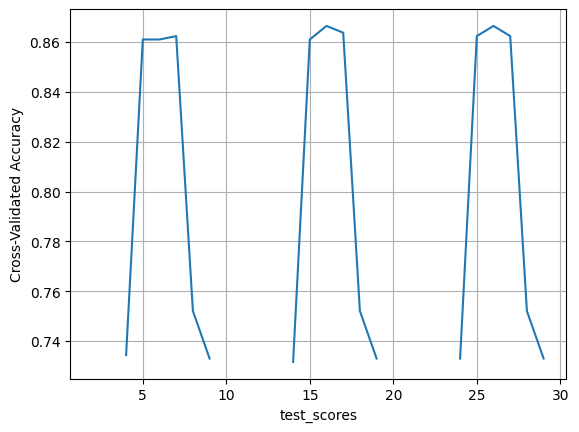

In [23]:
# plot the results
# this is identical to the one we generated above
plt.plot(test_scores)
plt.xlabel('test_scores')
plt.ylabel('Cross-Validated Accuracy')
plt.grid()

In [24]:
# применим оптимальные параметры к модели
model_2 = LogisticRegression(C=10, penalty='l2', solver='lbfgs')
model_2.fit(X_train, y_train)

LogisticRegression(C=10)

In [25]:
# для тестового множества сделаем предсказание целевой переменной
y_pred_2 = model_2.predict(X_test)
y_pred_2

array([0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1])

b) Используйте RandomizedSearchCV

In [26]:
# используем RandomizedSearchCV

param_distributions = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

random_search = RandomizedSearchCV(model, param_distributions, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [0.1, 1, 10],
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   random_state=42, scoring='accuracy')

In [27]:
random_search.best_params_

{'solver': 'liblinear', 'penalty': 'l2', 'C': 1}

In [28]:
random_search.best_estimator_

LogisticRegression(C=1, solver='liblinear')

In [29]:
random_search.best_score_

0.8637498835150497

In [30]:
random_search.best_estimator_.score(X_test, y_test)

0.8532608695652174

In [31]:
accuracy_score(random_search.best_estimator_.predict(X_test), y_test)

0.8532608695652174

In [32]:
random_search.cv_results_

{'mean_fit_time': array([0.00764337, 0.03414927, 0.00176835, 0.00852265, 0.02633591,
        0.02767801, 0.02417188, 0.03234353, 0.01026144, 0.00157919]),
 'std_fit_time': array([0.00188438, 0.0038078 , 0.00015187, 0.00113198, 0.00593247,
        0.00087539, 0.00088036, 0.00044748, 0.00253294, 0.0002559 ]),
 'mean_score_time': array([0.00338149, 0.00422277, 0.        , 0.00388327, 0.0032023 ,
        0.0029489 , 0.00350528, 0.00315037, 0.00289221, 0.        ]),
 'std_score_time': array([8.25101057e-04, 1.32586165e-04, 0.00000000e+00, 2.44093710e-04,
        2.55781141e-04, 1.05288258e-04, 9.22713222e-04, 9.16040793e-05,
        1.24095476e-04, 0.00000000e+00]),
 'param_solver': masked_array(data=['liblinear', 'newton-cg', 'sag', 'liblinear', 'sag',
                    'saga', 'sag', 'saga', 'liblinear', 'newton-cg'],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_

In [33]:
# create a list of the mean scores only
test_scores = random_search.cv_results_['mean_test_score']
print(test_scores)

[0.86238934 0.8610288         nan 0.86374988 0.75205479 0.73297922
 0.75205479 0.73161867 0.86239866        nan]


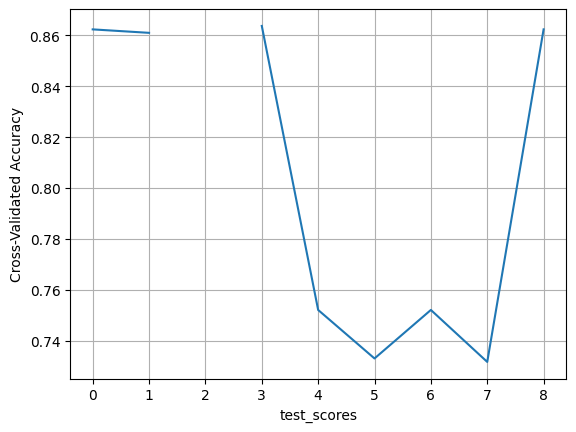

In [34]:
# plot the results
# this is identical to the one we generated above
plt.plot(test_scores)
plt.xlabel('test_scores')
plt.ylabel('Cross-Validated Accuracy')
plt.grid()

In [35]:
# применим оптимальные параметры к модели

model_3 = LogisticRegression(C=1, penalty='l2', solver='liblinear')
model_3.fit(X_train, y_train)

LogisticRegression(C=1, solver='liblinear')

In [36]:
# для тестового множества сделаем предсказание целевой переменной
y_pred_3 = model_3.predict(X_test)
y_pred_3

array([0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1])

c) *Добавьте в п. 6b 2-5 моделей классификации и вариации их параметров

In [37]:
from scipy.stats import uniform
from tqdm import tqdm

In [41]:
models=[
      {'name':'NB',"model":BernoulliNB(), 'params':{'alpha': uniform(loc=0, scale=4)}},
      {'name':'Lr',"model": LogisticRegression()  , 'params':{'C':[0.1,0.2,0.3,0.5,0.7,1], 'penalty':['l1', 'l2']}},
      {'name':'R',"model": Ridge(), 'params':{'alpha': uniform(loc=0, scale=4), 'solver':['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}},
      {'name':'SVC',"model": SVC(), 'params':{'kernel':['linear', 'poly', 'rbf', 'sigmoid'], 'gamma':['scale', 'auto']}},
      {'name':'RF',"model": RandomForestClassifier(), 'params':{'n_estimators':[10,25,50,100,150,200], 'criterion':['gini', 'entropy'], 'max_depth':[3,5,7,9,11]}},
      {'name':'KN',"model": KNeighborsClassifier(), 'params':{'n_neighbors':list(range(1,30)),'weights': ['uniform', 'distance'], 'p':[1,2,3]}},
      {'name':'DT',"model": DecisionTreeClassifier(), 'params':{'criterion':['gini', 'entropy'], 'max_depth':[3,5,7,9,11]}}

]

res=[]
for v in  tqdm(models):
    tmp_model = RandomizedSearchCV(v['model'], v['params'], cv=5)
    tmp_model.fit(X_train, y_train)
    res.append(((v['name'], tmp_model)))

100%|██████████| 7/7 [2:03:30<00:00, 1058.62s/it]


In [42]:
for r in res:
    print(r[0], r[1].best_score_, r[1].best_params_)

NB 0.8623707017053397 {'alpha': 1.360769803885856}
Lr 0.8664802907464356 {'penalty': 'l2', 'C': 0.5}
R 0.5560273338623323 {'alpha': 1.35504316563952, 'solver': 'lsqr'}
SVC 0.8651197465287485 {'kernel': 'linear', 'gamma': 'scale'}
RF 0.8759947814742335 {'n_estimators': 10, 'max_depth': 5, 'criterion': 'entropy'}
KN 0.7574690150032615 {'weights': 'uniform', 'p': 1, 'n_neighbors': 15}
DT 0.8269406392694064 {'max_depth': 3, 'criterion': 'gini'}


d) Повторите п. 5 после каждого итогового изменения параметров

In [38]:
metrics_model_2 = evaluate_model(model_2, X_test, y_test)
metrics_model_2

{'accuracy': array([0.837 , 0.9239, 0.8696, 0.9674, 0.8696, 0.8261, 0.8804, 0.837 ,
        0.7253, 0.7802]),
 'recall': array([0.7843, 0.902 , 0.8431, 0.9804, 0.9804, 1.    , 0.9804, 0.8235,
        0.76  , 0.7   ]),
 'precision': array([0.9091, 0.9583, 0.9149, 0.9615, 0.8197, 0.7612, 0.8333, 0.875 ,
        0.7451, 0.875 ]),
 'f1': array([0.8421, 0.9293, 0.8776, 0.9709, 0.8929, 0.8644, 0.9009, 0.8485,
        0.7525, 0.7778])}

In [39]:
metrics_model_3 = evaluate_model(model_3, X_test, y_test)
metrics_model_3

{'accuracy': array([0.837 , 0.9239, 0.8696, 0.9565, 0.8696, 0.8478, 0.8804, 0.837 ,
        0.7363, 0.7692]),
 'recall': array([0.7843, 0.902 , 0.8431, 0.9608, 0.9804, 1.    , 0.9804, 0.8235,
        0.76  , 0.7   ]),
 'precision': array([0.9091, 0.9583, 0.9149, 0.9608, 0.8197, 0.7846, 0.8333, 0.875 ,
        0.76  , 0.8537]),
 'f1': array([0.8421, 0.9293, 0.8776, 0.9608, 0.8929, 0.8793, 0.9009, 0.8485,
        0.76  , 0.7692])}

## Сформулируйте выводы по проделанной работе

a) Сравните метрики построенных моделей

In [40]:
# сравним метрики построенных моделей
print('модель логистической регрессии с параметрами по умолчанию:', '\n', metrics_model_1)
print('модель после оптимизации (GridSearchCV):', '\n', metrics_model_2)
print('модель после оптимизации (RandomizedSearchCV):', '\n', metrics_model_3)

модель логистической регрессии с параметрами по умолчанию: 
 {'accuracy': array([0.837 , 0.9239, 0.8587, 0.9565, 0.8696, 0.8478, 0.8804, 0.837 ,
       0.7363, 0.7802]), 'recall': array([0.7843, 0.902 , 0.8235, 0.9608, 0.9804, 1.    , 0.9804, 0.8235,
       0.76  , 0.7   ]), 'precision': array([0.9091, 0.9583, 0.913 , 0.9608, 0.8197, 0.7846, 0.8333, 0.875 ,
       0.76  , 0.875 ]), 'f1': array([0.8421, 0.9293, 0.866 , 0.9608, 0.8929, 0.8793, 0.9009, 0.8485,
       0.76  , 0.7778])}
модель после оптимизации (GridSearchCV): 
 {'accuracy': array([0.837 , 0.9239, 0.8696, 0.9674, 0.8696, 0.8261, 0.8804, 0.837 ,
       0.7253, 0.7802]), 'recall': array([0.7843, 0.902 , 0.8431, 0.9804, 0.9804, 1.    , 0.9804, 0.8235,
       0.76  , 0.7   ]), 'precision': array([0.9091, 0.9583, 0.9149, 0.9615, 0.8197, 0.7612, 0.8333, 0.875 ,
       0.7451, 0.875 ]), 'f1': array([0.8421, 0.9293, 0.8776, 0.9709, 0.8929, 0.8644, 0.9009, 0.8485,
       0.7525, 0.7778])}
модель после оптимизации (RandomizedSearchCV

b) *Сравните с полученными результатами в домашнем задании по теме «Ансамблирование»

Метрики качества из домашней работы 7 по теме "Ансамблирование"

model_1 (DecisionTreeClassifier):

               precision    recall  f1-score   support

      y_test       0.73      0.83      0.78        77
    y_pred_1       0.86      0.78      0.82       107

    accuracy                           0.80       184
   macro avg       0.80      0.80      0.80       184

weighted avg       0.81      0.80      0.80       184

model_2 (RandomForestClassifier):

               precision    recall  f1-score   support

      y_test       0.85      0.87      0.86        77
    y_pred_2       0.90      0.89      0.90       107

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184

weighted avg       0.88      0.88      0.88       184

model_3 (BaggingClassifier):

               precision    recall  f1-score   support

      y_test       0.82      0.84      0.83        77
    y_pred_3       0.89      0.87      0.88       107

    accuracy                           0.86       184
   macro avg       0.85      0.86      0.86       184

weighted avg       0.86      0.86      0.86       184

model_4 (StackingClassifier):

               precision    recall  f1-score   support

      y_test       0.82      0.87      0.84        77
    y_pred_4       0.90      0.86      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184

weighted avg       0.87      0.86      0.86       184

В домашнем задании 7 были построены 4 модели. И по совокупности признаков качества (precision, recall и f1-score) были сделаны следующие выводы:

model_1 (DecisionTreeClassifier) - наименее хорошая модель
model_2 (RandomForestClassifier) - наиболее хорошая модель
модели model_3 (BaggingClassifier) и model_4 (StackingClassifier) не привели к улучшению и показали результаты хуже в сравнении с моделью model_2 (RandomForestClassifier)

Вывод:

Если сравнивать метрики качества моделей, построенных в домашней работе 7 с моделями, построенными в текущей домашней работе, то использование GridSearchCV и RandomizedSearchCV позволило значительно улучшить метрики качества моделей, т.к. с их помощью были найдены лучшие параметры моделей, что смогло повысить метрики качества моделей